In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
from sklearn.tree import DecisionTreeRegressor


## EDA

In [2]:
df = pd.read_csv("city_day_new.csv")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
len(df['City'].unique())

25

In [5]:
l=df['City'].value_counts().head(10).index

In [6]:
l

Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28474 entries, 0 to 28473
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        28474 non-null  object 
 1   Date        28474 non-null  object 
 2   PM2.5       23920 non-null  float64
 3   PM10        17465 non-null  float64
 4   NO          25011 non-null  float64
 5   NO2         24966 non-null  float64
 6   NOx         24330 non-null  float64
 7   NH3         18335 non-null  float64
 8   CO          26452 non-null  float64
 9   SO2         24674 non-null  float64
 10  O3          24526 non-null  float64
 11  Benzene     22964 non-null  float64
 12  Toluene     20635 non-null  float64
 13  Xylene      11239 non-null  float64
 14  AQI         23894 non-null  float64
 15  AQI_Bucket  23894 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.5+ MB


In [8]:
df[["Year","Month","Day"]] = df["Date"].str.split("-",expand=True)
df["Year"] = df["Year"].astype(int)
df["Day"] = df["Day"].astype(int)
dict = {
            'Jan': 1,
            'Feb': 2,
            'Mar': 3,
            'Apr': 4,
            'May': 5,
            'Jun': 6,
            'Jul': 7,
            'Aug': 8,
            'Sep': 9, 
            'Oct': 10,
            'Nov': 11,
            'Dec': 12
    }
df["Month"].replace(dict,inplace=True)
df=df.drop(["Date","AQI_Bucket"],axis=1)
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month,Day
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,2015,01,1
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,2015,01,2
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,2015,01,3
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,2015,01,4
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,2015,01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28469,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,2020,06,27
28470,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,2020,06,28
28471,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,2020,06,29
28472,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,2020,06,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28474 entries, 0 to 28473
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     28474 non-null  object 
 1   PM2.5    23920 non-null  float64
 2   PM10     17465 non-null  float64
 3   NO       25011 non-null  float64
 4   NO2      24966 non-null  float64
 5   NOx      24330 non-null  float64
 6   NH3      18335 non-null  float64
 7   CO       26452 non-null  float64
 8   SO2      24674 non-null  float64
 9   O3       24526 non-null  float64
 10  Benzene  22964 non-null  float64
 11  Toluene  20635 non-null  float64
 12  Xylene   11239 non-null  float64
 13  AQI      23894 non-null  float64
 14  Year     28474 non-null  int32  
 15  Month    28474 non-null  object 
 16  Day      28474 non-null  int32  
dtypes: float64(13), int32(2), object(2)
memory usage: 3.5+ MB


## Numerical Features

In [10]:
Numerical_features=[features for features in df.columns if df[features].dtype!='O']

In [11]:
Numerical_features

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'Year',
 'Day']

In [12]:
Categorical_features=[features for features in df.columns if features not in Numerical_features]

In [13]:
Categorical_features

['City', 'Month']

In [14]:
for features in Categorical_features:
    print(f"No of unique values in {features}:{len(df[features].unique())}")

No of unique values in City:25
No of unique values in Month:12


## Missing Values:

In [15]:
df.isnull().sum()

City           0
PM2.5       4554
PM10       11009
NO          3463
NO2         3508
NOx         4144
NH3        10139
CO          2022
SO2         3800
O3          3948
Benzene     5510
Toluene     7839
Xylene     17235
AQI         4580
Year           0
Month          0
Day            0
dtype: int64

In [16]:
df.shape

(28474, 17)

In [17]:
for features in df.columns:
    print(f"The percentage of null values of {features} is :  {round(df[features].isnull().sum()/df.shape[0],2)}")

The percentage of null values of City is :  0.0
The percentage of null values of PM2.5 is :  0.16
The percentage of null values of PM10 is :  0.39
The percentage of null values of NO is :  0.12
The percentage of null values of NO2 is :  0.12
The percentage of null values of NOx is :  0.15
The percentage of null values of NH3 is :  0.36
The percentage of null values of CO is :  0.07
The percentage of null values of SO2 is :  0.13
The percentage of null values of O3 is :  0.14
The percentage of null values of Benzene is :  0.19
The percentage of null values of Toluene is :  0.28
The percentage of null values of Xylene is :  0.61
The percentage of null values of AQI is :  0.16
The percentage of null values of Year is :  0.0
The percentage of null values of Month is :  0.0
The percentage of null values of Day is :  0.0


## Distribution of Numerical Features

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


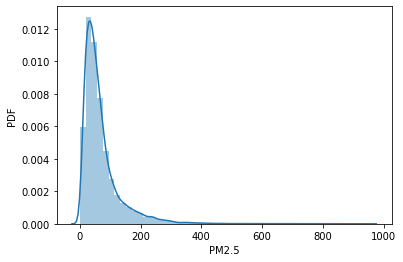

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


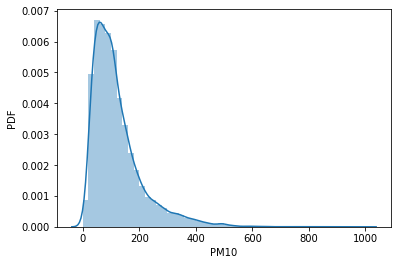

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


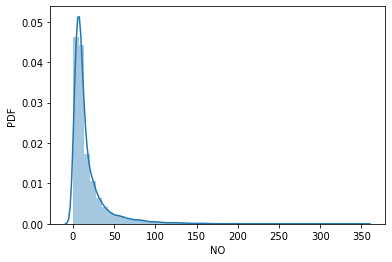

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


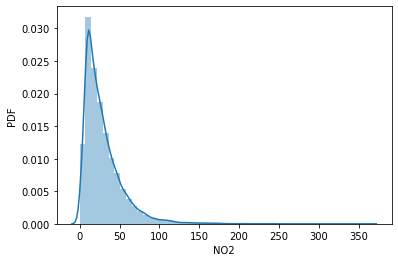

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


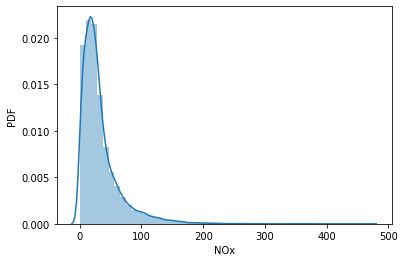

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


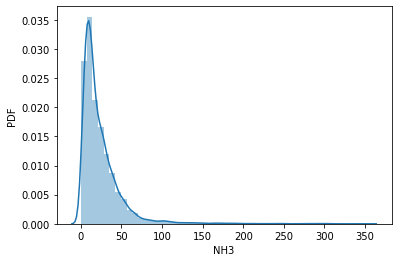

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


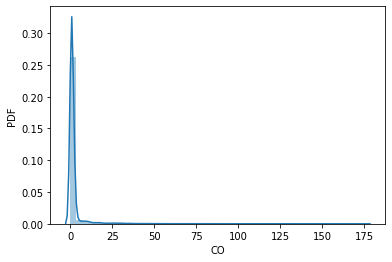

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


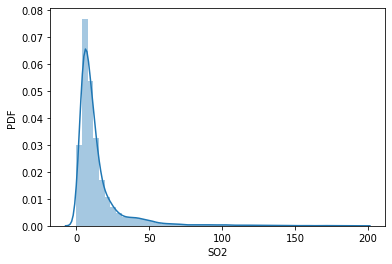

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


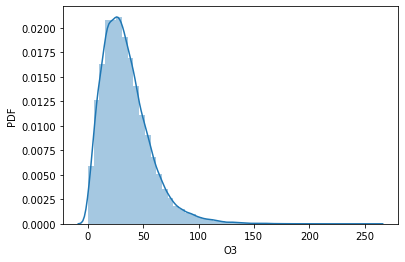

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


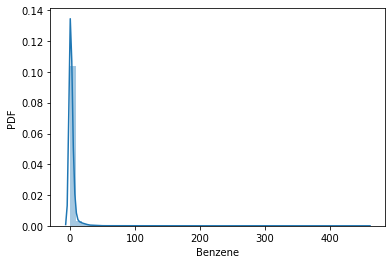

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


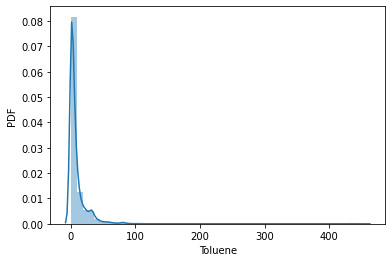

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


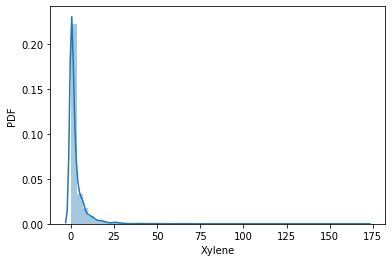

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


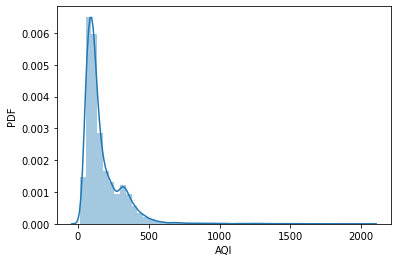

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


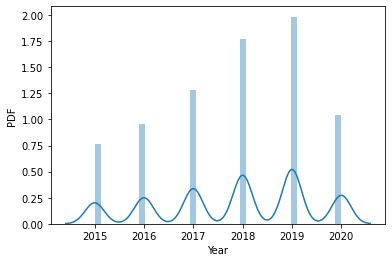

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


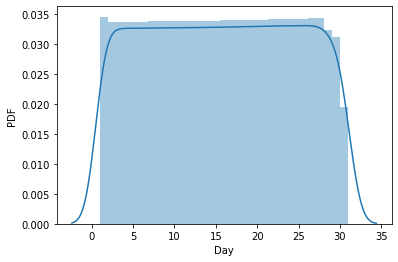

In [18]:
for features in Numerical_features:
    sns.distplot(df[features])
    plt.xlabel(features)
    plt.ylabel('PDF')
    plt.show()

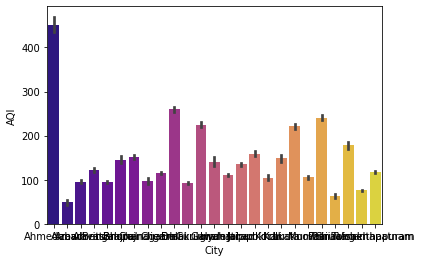

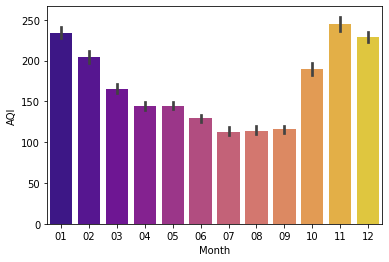

In [19]:
for features in Categorical_features:
    sns.barplot(x =features, y ='AQI', data = df, palette ='plasma')
    plt.show()
    

## outliers

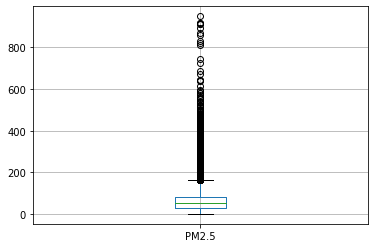

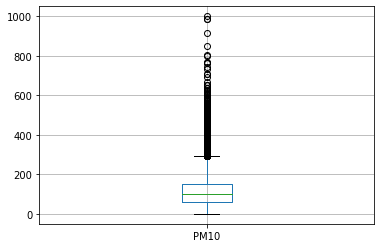

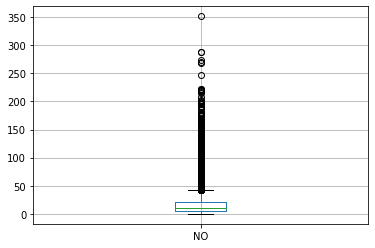

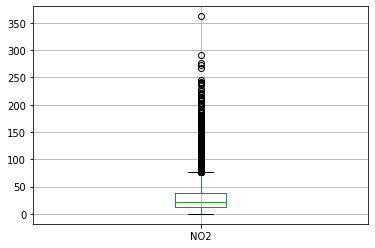

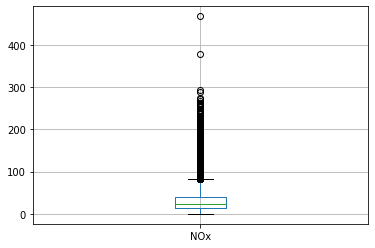

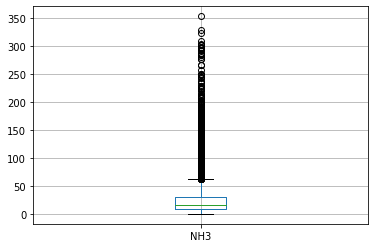

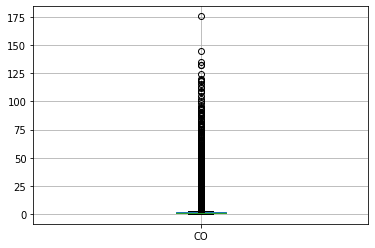

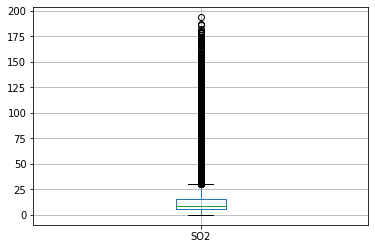

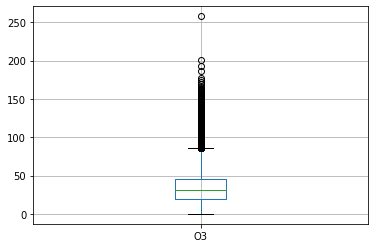

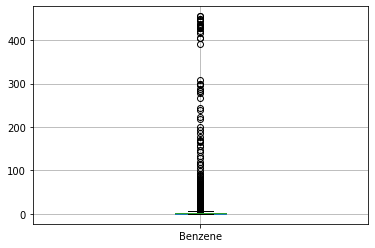

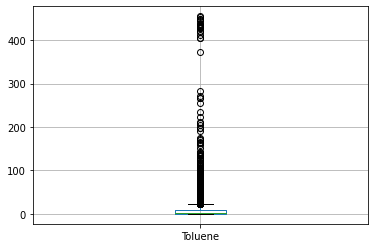

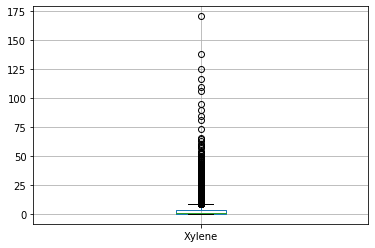

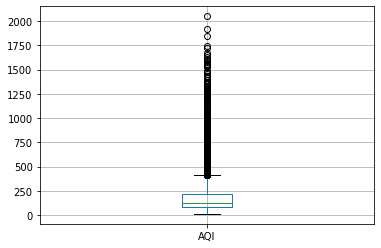

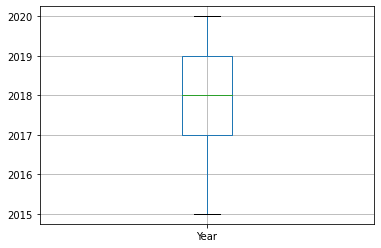

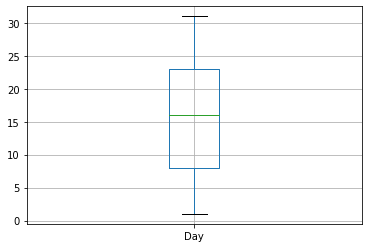

In [20]:
for features in Numerical_features:
    df.boxplot(column=features)
    plt.show()

In [21]:
for features in Numerical_features:
    q3=df[features].quantile(0.75)
    q1=df[features].quantile(0.25)
    IQR=q3-q1
    max_range=q3+(1.5*IQR)
    min_range=q1-(1.5*IQR)
    df.loc[df[features]>max_range,features]=max_range

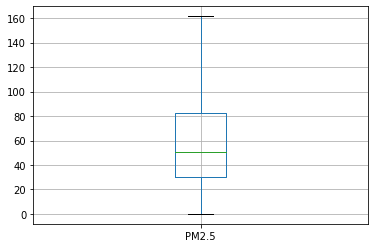

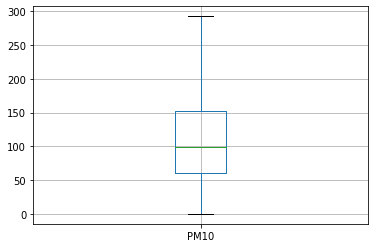

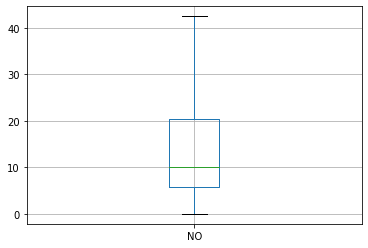

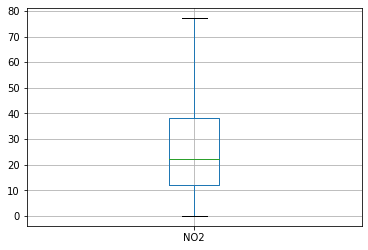

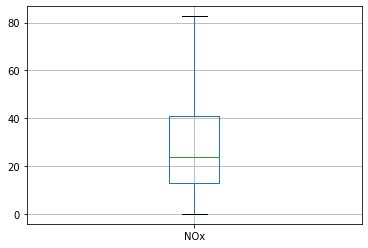

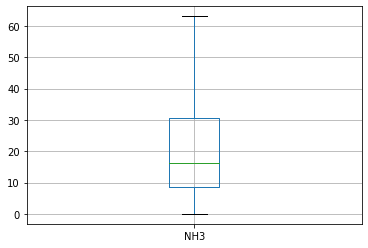

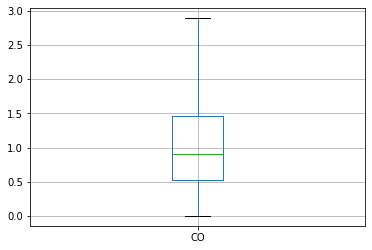

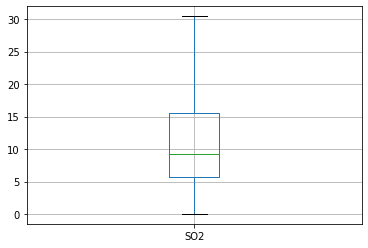

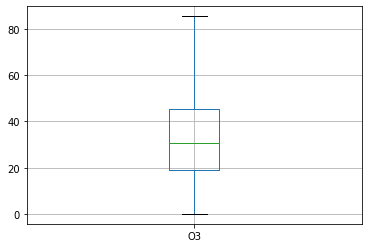

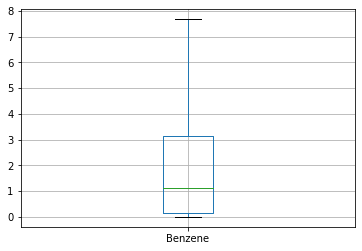

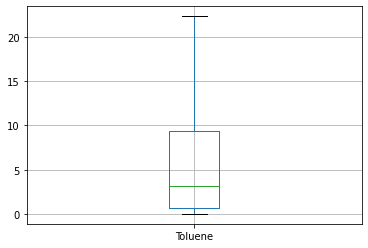

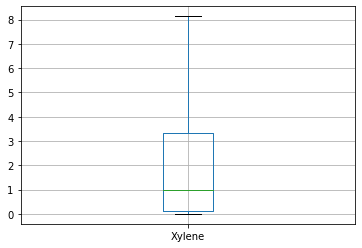

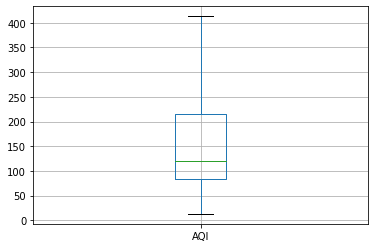

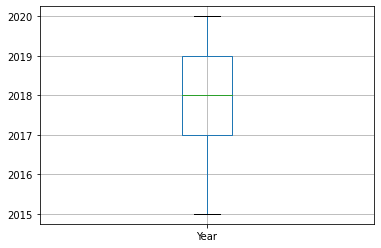

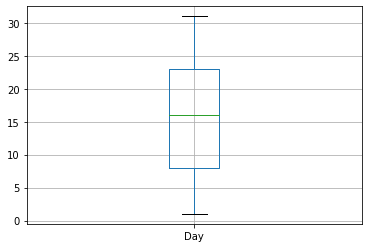

In [22]:
for features in Numerical_features:
    df.boxplot(column=features)
    plt.show()

In [23]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Year', 'Month', 'Day'],
      dtype='object')

In [24]:
#sns.pairplot(df)

## FEATURE ENGINEERING

In [25]:
for features in df.columns:
    df[features].fillna(df[features].mode(),inplace=True)

In [26]:

df['PM2.5'].median()
df['PM10'].median()
df['NO'].median()
df['NO2'].median()
df['NOx'].median()
df['NH3'].median()
df['CO'].median()
df['SO2'].median()
df['O3'].median()
df['Benzene'].median()
df['Toluene'].median()
df['Xylene'].median()
df['AQI'].median()
df['PM2.5'].fillna(df['PM2.5'].median(),inplace=True)
df['PM10'].fillna(df['PM10'].median(),inplace=True)
df['NO'].fillna(df['NO'].median(),inplace=True)
df['NO2'].fillna(df['NO2'].median(),inplace=True)
df['NOx'].fillna(df['NOx'].median(),inplace=True)
df['NH3'].fillna(df['NH3'].median(),inplace=True)
df['CO'].fillna(df['CO'].median(),inplace=True)
df['SO2'].fillna(df['SO2'].median(),inplace=True)
df['O3'].fillna(df['O3'].median(),inplace=True)
df['Benzene'].fillna(df['Benzene'].median(),inplace=True)
df['Toluene'].fillna(df['Toluene'].median(),inplace=True)
df['Xylene'].fillna(df['Xylene'].median(),inplace=True)
df['AQI'].fillna(df['AQI'].median(),inplace=True)

df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
Year       0
Month      0
Day        0
dtype: int64

In [27]:
## SCALING
## MIN_MAX_SCALER
## STANDARDSCALER

In [28]:
df.shape

(28474, 17)

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,28474.0,60.787798,40.224472,0.04,33.4800,50.220,73.9800,161.48750
PM10,28474.0,109.523038,58.577664,0.01,84.0200,98.820,113.7725,292.57500
NO,28474.0,14.275951,11.841107,0.02,6.3600,10.080,17.9575,42.48500
NO2,28474.0,26.959879,18.645249,0.01,13.2500,22.110,35.0900,77.15125
NOx,28474.0,29.124795,21.515255,0.00,14.8100,23.910,36.5000,82.66875
NH3,28474.0,19.746812,13.858897,0.01,12.3125,16.170,21.9600,63.04750
CO,28474.0,1.082381,0.802095,0.00,0.5500,0.905,1.4000,2.89500
SO2,28474.0,11.584720,7.984194,0.01,6.0900,9.220,14.0500,30.44000
O3,28474.0,33.529356,18.476751,0.01,20.8000,30.835,42.6100,85.54125
Benzene,28474.0,1.857064,2.127876,0.00,0.2800,1.120,2.4900,7.67500


In [30]:
df = pd.get_dummies(df, columns = ['City'])

In [31]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
count,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,...,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000
mean,60.787798,109.523038,14.275951,26.959879,29.124795,19.746812,1.082381,11.584720,33.529356,1.857064,...,0.041055,0.005689,0.026445,0.068413,0.070556,0.065253,0.008745,0.030343,0.039053,0.051345
std,40.224472,58.577664,11.841107,18.645249,21.515255,13.858897,0.802095,7.984194,18.476751,2.127876,...,0.198421,0.075215,0.160458,0.252458,0.256086,0.246975,0.093106,0.171534,0.193725,0.220705
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.480000,84.020000,6.360000,13.250000,14.810000,12.312500,0.550000,6.090000,20.800000,0.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.220000,98.820000,10.080000,22.110000,23.910000,16.170000,0.905000,9.220000,30.835000,1.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.980000,113.772500,17.957500,35.090000,36.500000,21.960000,1.400000,14.050000,42.610000,2.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,161.487500,292.575000,42.485000,77.151250,82.668750,63.047500,2.895000,30.440000,85.541250,7.675000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28474 entries, 0 to 28473
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PM2.5                    28474 non-null  float64
 1   PM10                     28474 non-null  float64
 2   NO                       28474 non-null  float64
 3   NO2                      28474 non-null  float64
 4   NOx                      28474 non-null  float64
 5   NH3                      28474 non-null  float64
 6   CO                       28474 non-null  float64
 7   SO2                      28474 non-null  float64
 8   O3                       28474 non-null  float64
 9   Benzene                  28474 non-null  float64
 10  Toluene                  28474 non-null  float64
 11  Xylene                   28474 non-null  float64
 12  AQI                      28474 non-null  float64
 13  Year                     28474 non-null  int32  
 14  Month                 

In [33]:
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
PM2.5,1.000000,0.605138,0.466254,0.446857,0.429158,0.267625,0.346863,0.232486,0.210442,0.223268,...,-0.031346,-0.055212,0.008847,0.222346,-0.112540,0.193358,-0.064204,-0.007456,-0.159944,-0.077489
PM10,0.605138,1.000000,0.455531,0.413608,0.458349,0.288301,0.215070,0.287058,0.211402,0.257003,...,0.073988,-0.054479,0.021182,-0.049516,-0.054057,-0.035327,-0.084489,0.106753,-0.189591,-0.018901
NO,0.466254,0.455531,1.000000,0.525354,0.770391,0.235282,0.348759,0.318506,-0.012181,0.302840,...,-0.060754,0.152181,0.052322,-0.010336,0.052130,0.185767,-0.089136,0.105586,-0.181086,-0.042937
NO2,0.446857,0.413608,0.525354,1.000000,0.612252,0.295868,0.286662,0.322852,0.320246,0.387424,...,-0.162851,-0.047858,0.109488,0.092888,-0.053078,0.087467,-0.099211,-0.110077,-0.186241,0.093281
NOx,0.429158,0.458349,0.770391,0.612252,1.000000,0.222769,0.313099,0.273477,0.077702,0.332794,...,-0.050152,0.109556,0.160597,-0.081395,0.160582,0.116436,-0.109987,-0.000289,-0.194118,-0.043491
NH3,0.267625,0.288301,0.235282,0.295868,0.222769,1.000000,0.119679,-0.002743,0.112357,0.126667,...,-0.147150,-0.059640,-0.008573,0.061173,-0.080224,-0.063876,-0.093761,-0.093145,-0.197194,-0.134572
CO,0.346863,0.215070,0.348759,0.286662,0.313099,0.119679,1.000000,0.334065,0.061687,0.232976,...,-0.081181,0.020209,-0.050702,0.163479,-0.176382,0.118490,-0.086666,0.130552,-0.036117,-0.098953
SO2,0.232486,0.287058,0.318506,0.322852,0.273477,-0.002743,0.334065,1.000000,0.211909,0.203142,...,0.159816,0.056953,-0.062263,-0.107195,-0.007577,0.152694,-0.057766,0.200678,-0.147395,0.008857
O3,0.210442,0.211402,-0.012181,0.320246,0.077702,0.112357,0.061687,0.211909,1.000000,0.119594,...,-0.025725,-0.121633,-0.024752,0.039723,-0.028621,0.026055,-0.009067,-0.146792,0.011097,0.020832
Benzene,0.223268,0.257003,0.302840,0.387424,0.332794,0.126667,0.232976,0.203142,0.119594,1.000000,...,-0.071673,-0.026202,0.275053,-0.027710,-0.104059,-0.051179,-0.026469,-0.124798,-0.069830,0.204916


In [34]:
x=df.drop(['AQI'],axis=1)
y=df['AQI']

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(Y_train.shape)

(22779, 40)
(22779,)


## RANDOMFOREST

In [36]:
clf=RandomForestRegressor()

In [37]:
clf.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
score=clf.score(X_test,Y_test)

In [39]:
score

0.903031956604017

In [40]:
Y_true=clf.predict(X_test)

In [41]:
error=mean_squared_error(Y_test,Y_true)

In [42]:
error

932.9841827041266

In [43]:
er=mean_absolute_error(Y_test,Y_true)

In [44]:
er

17.272138718173835

## LINEAR REGRESSION

In [45]:
model2=LinearRegression()

In [46]:
model2.fit(X_train,Y_train)

LinearRegression()

In [47]:
score=model2.score(X_test,Y_test)

In [48]:
score

0.8131134742399484

In [49]:
y_pred=model2.predict(X_test)

In [50]:
error2=mean_squared_error(Y_test,y_pred)

In [51]:
error2

1798.1405666052508

## DECISIONTREE

In [52]:
model3=DecisionTreeRegressor()

In [53]:
model3.fit(X_train,Y_train)

DecisionTreeRegressor()

In [54]:
score=model3.score(X_test,Y_test)

In [55]:
score

0.8134163957880077

In [56]:
y_pred=model3.predict(X_test)

In [57]:
error3=mean_squared_error(Y_test,y_pred)

In [58]:
error3

1795.2259877085162